# HOP02 - Hopfield-Netzwerke

Das Hopfield-Netzwerk ist ein _rekurrentes neuronales Netzwerk_, das in der künstlichen Intelligenz vor allem für das _Assoziative Gedächtnis_ verwendet wird. Es wurde 1982 von __John Hopfield__ entwickelt und ist ein Modell, das auf der Funktionsweise biologischer Nervensysteme basiert. Der Hauptzweck eines Hopfield-Netzwerks besteht darin, gespeicherte Muster oder Erinnerungen aus unvollständigen oder verrauschten Informationen zu rekonstruieren. Dabei handelt es sich um eine Form des _inhaltadressierbaren Speichers_, bei dem Informationen durch ihren Inhalt und nicht durch eine Speicheradresse abgerufen werden.

## Entwicklung eines einfachen Hopfield-Netzwerks

Wir wollen die Arbeitsweise an einem konketen Beispiel demonstrieren, in dem ein Hopfiel-Netz bauen, das eine Anzahl von Bildmustern speichert und diese bei Eingabe von verrauschten Daten wieder rekonstruiert.

#### Beispiel-Muster (Grafiken)

Als Beispiele verwenden wir einfache zweidimensional Bitmuster:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import patterns
from patterns import display_grid, display_grid, plot_patterns

np.set_printoptions(precision=2)


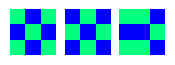

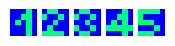

In [2]:
numbers = patterns.numbers
simple = patterns.simple
smileys = patterns.smileys

plot_patterns(simple,"")
plot_patterns(numbers,"")


### Aufbau

Im ersten Schritt erzeugen wir die Struktur des Hopfield-Netzwerks. Das ist recht einfach: Ein Hopfield-Netzwerk besteht aus einer Anzahl $N$ von Neuronen  $x_k$. $N$ ist die Anzahl der "Pixel" in unserem Muster. Jedes Neuron ist mit jedem anderen verbunden ist. Jede Verbindung ist dabei gewichtet, d.h. wir haben eine Menge von Gewichten $w_{ik}$ für die Verbindung vom Neuron $x_i$ zum Neuron $x_k$. 

Wir brauchen also nur eine quadratische Matrix von Gewichten zu erzeugen, die wir z.B. mit Nullen initialisieren:

In [3]:
def init(N):
    return np.zeros((N,N))

Dadurch ist zwar jedes Neuron auch mit sich selbst verbunden, aber wir werden die entspechenden Gewicht $x_{kk}$ einfach auf 0 setzen.

Wir arbeiten mit zweidimensionalen Mustern; die Anzahl der Neuronen ist daher gleich der Breite mal der Höhe der Bilder. 

In [4]:
beispiel = simple
shape = beispiel[0].shape

W = init(np.prod(shape))

#### Lernphase

Das Netzwerk lernt, indem es die Gewichte zwischen den Neuronen so anpasst, dass gespeicherte Muster stabile Zustände darstellen. Die Gewichtsmatrix $W$ wird normalerweise durch eine __Hebbsche Lernregel__ bestimmt, die wie folgt lautet:

$$ w_{ij} = \frac{1}{N} \sum_{p=1}^N x_i^p x_j^p $$

wobei:
- $N$ die Anzahl der Neuronen
- $p$ die Anzahl der zu speichernden Muster
- $x_i^N$ der Wert des $i$-ten Neurons im $p$-ten Muster

Die Kombination $x_i x_j$ bildet das __äußere Produkt__ (auch __Tensorprodukt__ genannt) des Vektors $x_k$ mit sich selbst. Während bei dem _inneren Produkt_ $x_k y_k$ zweier vektoren ein Skalar entsteht, erhält man beim Tensorpdoukt zweier Vektoren eine Matrix. Das tensorprodukt wir mit dem Symbol $\otimes$ bezeichnet; wir können also kurz $W = \frac{1}{N} \sum_p x^p \otimes x^p$ schreiben

Dabei gilt für die Gewichte:

- $W$ ist symmetrisch: $ w_{ik} = w_{ki} $
- Die Diagonale von $W$ ist 0, d.h. $ w_{kk} = 0 $ (gefordert)

Diese Trainings-Funktion ist schnell implementiert. Dabei machen wir aus den Bitmaps einfache Arrays mit Hilfe der Funktion _flatten_:

In [5]:
def train(weights, patterns):
    for pattern in patterns:
        flat_pattern = pattern.flatten()
        weights += np.outer(flat_pattern, flat_pattern)
    np.fill_diagonal(weights, 0) # Diagonale = 0
    weights /= len(patterns) # Normierung
    return weights

In [6]:
W = train(W,beispiel)

### Erinnern
 Nachdem wir unser "Gedächtnis" trainiert haben, rufen wir nun die "Erinnerungen" ab:

In [7]:
def recall(weights, pattern, steps=5):
    flat_pattern = pattern.flatten()
    for _ in range(steps):
        flat_pattern = np.sign(np.dot(weights, flat_pattern))
    return flat_pattern

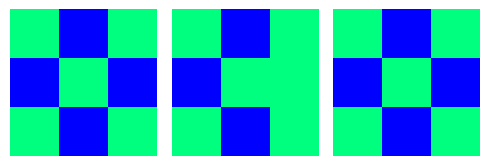

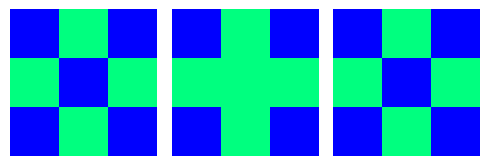

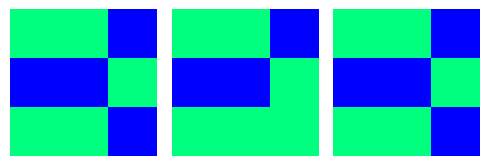

In [8]:
W = train(W,beispiel)

for b in beispiel:
    bn = patterns.add_noise(b,0.2)
    result = recall(W,bn).reshape(shape)
    display_grid([b,bn,result],1,3, cm="winter")